In [1]:
import pandas as pd
from pandas import DataFrame,Series
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
creditData : DataFrame = pd.read_csv('./data/cc_default.csv', encoding='UTF-8')

In [3]:
creditData.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,"""BILL_AMT4""",BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
creditData.dtypes

LIMIT_BAL               int64
SEX                     int64
EDUCATION               int64
MARRIAGE                int64
AGE                     int64
PAY_0                   int64
PAY_2                   int64
PAY_3                   int64
PAY_4                   int64
PAY_5                   int64
PAY_6                   int64
BILL_AMT1               int64
BILL_AMT2               int64
BILL_AMT3               int64
         "BILL_AMT4"    int64
BILL_AMT5               int64
BILL_AMT6               int64
PAY_AMT1                int64
PAY_AMT2                int64
PAY_AMT3                int64
PAY_AMT4                int64
PAY_AMT5                int64
PAY_AMT6                int64
DEFAULT                 int64
dtype: object

In [5]:
creditDataAttributes = creditData.drop(columns=["DEFAULT"])

In [6]:
creditDataLabels = creditData["DEFAULT"].values

In [7]:
attributeScaler = StandardScaler()

In [8]:
attributeScaler.fit(creditDataAttributes)

StandardScaler()

In [9]:
creditDataAttributesScaled: DataFrame = attributeScaler.transform(creditDataAttributes)

In [10]:
trainingAttributes, testingAttributes, trainingLabels, testingLabels = train_test_split(creditDataAttributesScaled,creditDataLabels,random_state = 72)

In [11]:
numberOfInputs: int = 23
numberOfHiddenNodes: int = 3*numberOfInputs

In [12]:
neuralNet: Sequential = Sequential()

In [13]:
neuralNet.add(Dense(units=numberOfHiddenNodes, input_dim=numberOfInputs, activation ='relu'))

In [14]:
neuralNet.add(Dense(units=1,activation='sigmoid'))

In [15]:
neuralNet.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy"])

In [16]:
model = neuralNet.fit(trainingAttributes, trainingLabels, epochs=100)

Epoch 1/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4770 - accuracy: 0.8062
Epoch 2/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4492 - accuracy: 0.8168
Epoch 3/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4422 - accuracy: 0.8183
Epoch 4/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4387 - accuracy: 0.8192
Epoch 5/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4370 - accuracy: 0.8190
Epoch 6/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4352 - accuracy: 0.8189
Epoch 7/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4334 - accuracy: 0.8208
Epoch 8/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4333 - accuracy: 0.8208
Epoch 9/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4320 - accuracy: 0.8186
Epoch 10/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4312 - accura

704/704 [==============================] - 1s 2ms/step - loss: 0.4104 - accuracy: 0.8264
Epoch 82/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4093 - accuracy: 0.8275
Epoch 83/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4100 - accuracy: 0.8279
Epoch 84/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4095 - accuracy: 0.8265
Epoch 85/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4091 - accuracy: 0.8273
Epoch 86/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4091 - accuracy: 0.8279
Epoch 87/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8280
Epoch 88/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4089 - accuracy: 0.8267
Epoch 89/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8264
Epoch 90/100
704/704 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 

In [20]:
modelLoss: DataFrame = pd.DataFrame(model.history, index=range(1, len(model.history['loss']) + 1))


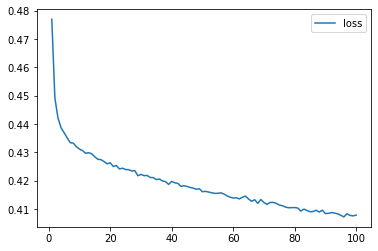

In [21]:
modelLoss.plot(y='loss')

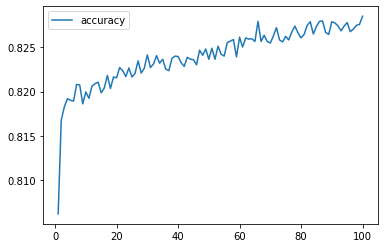

In [22]:
modelLoss.plot(y='accuracy')

In [23]:
loss, accuracy = neuralNet.evaluate(testingAttributes, testingLabels)

235/235 [==============================] - 0s 1ms/step - loss: 0.4439 - accuracy: 0.8133
